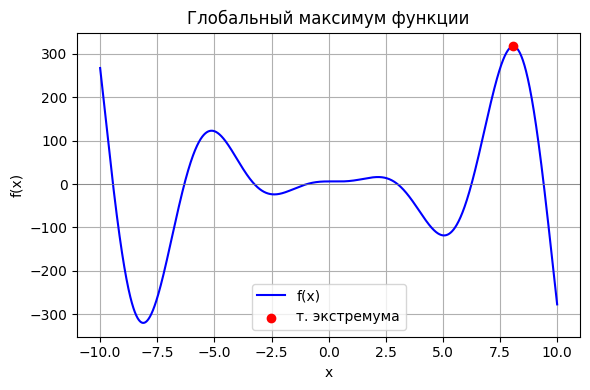

аргумент, при котором f(x) достигла максимума, равен 8.079256
функция в точке максимума равна 316.785160


In [1]:
# Импорт библиотек numpy, matplotlib и scipy:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Основная функция:
def f(x):
    w = 5 # параметр
    return 6 * np.cos(x) + w * x**2 * np.sin(x)

# Функция отрицательная к заданной:
def fm(x):
    return -f(x)

# Интервал поиска:
a, b = -10, 10

# Список стартовых точек:
start_points = np.linspace(a, b, 20)

# Поиск локальных максимумов:
candidates = []

for i in range(len(start_points) - 1):
    # Ограниченный подынтервал:
    left = start_points[i]
    right = start_points[i + 1]

    # Поиск на данном участке:
    res = minimize_scalar(fm, bounds=(left, right), 
                          method="bounded")
    x_max_local = res.x
    y_max_local = f(x_max_local)
    candidates.append((x_max_local, y_max_local))

# Глобальный максимум из всех локальных:
x_max, y_max = max(candidates, 
                   key=lambda item: item[1])

# Значения x и y для графика:
x_vals = np.linspace(a, b, 2000)
y_vals = f(x_vals)

# Построение графика:
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label="f(x)", color="b")
plt.scatter(x_max, y_max, color="r", 
            label="т. экстремума", zorder=5)

# Стиль и оформление:
plt.axhline(0, color="gray", linewidth=0.5)
plt.title("Глобальный максимум функции")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Вывод результата:
print(f"аргумент, при котором f(x) достигла максимума, равен {x_max:.6f}")
print(f"функция в точке максимума равна {y_max:.6f}")


In [2]:
import numpy as np

# Основная функция:
def f(x):
    w = 5 # параметр
    return 6 * np.cos(x) + w * x**2 * np.sin(x)

# Начальные значения:
a, b = -10, 10 # интервал поиска
eps = 1e-10 # точность
h = 1.0 # начальный шаг

# Инициализация значений функции:
x_current = a
x_max = x_current
f_max = f(x_current)

# Нахождение примерного максимума:
while x_current <= b:
    fx = f(x_current)
    if fx > f_max:
        f_max = fx
        x_max = x_current
    x_current += h

# Итерационное уточнение:
while h > eps:
    h /= 10
    x_left = x_max - h
    x_right = x_max + h

    # Поиск точного максимума в окрестности x_max:
    candidates = np.linspace(x_left, x_right, 11)
    for x_cand in candidates:
        fx = f(x_cand)
        if fx > f_max:
            f_max = fx
            x_max = x_cand

# Вывод результатов:
print(f"аргумент, при котором f(x) достигла максимума, равен {x_max:.6f}")
print(f"функция в точке максимума равна {y_max:.6f}")


аргумент, при котором f(x) достигла максимума, равен 8.079256
функция в точке максимума равна 316.785160


In [3]:
import numpy as np
from scipy.optimize import minimize_scalar


# Заданные параметры:
a, b = -10, 10
eps = 1e-10
iterations = 100
threshold = 1e-5

# Хранилище ошибок:
errors = []
count_large_errors = 0

# Определение функции:
def f(x, w):
    return 6 * np.cos(x) + w * x**2 * np.sin(x)

# Функция отрицательная к заданной:
def fm(x, w):
    return -f(x, w)


# Метод 1: адаптированный minimize_scalar
def scalar_max(w):
    # Список стартовых точек:
    start_points = np.linspace(a, b, 20)

    # Поиск локальных максимумов:
    candidates = []

    for i in range(len(start_points) - 1):
        # Ограниченный подынтервал:
        left = start_points[i]
        right = start_points[i + 1]

        # Поиск на данном участке:
        res = minimize_scalar(lambda x: fm(x, w), 
                              bounds=(left, right), 
                              method="bounded")
        x_max_local = res.x
        y_max_local = f(x_max_local, w)
        candidates.append((x_max_local, y_max_local))

    # Глобальный максимум из всех локальных:
    x_max, y_max = max(candidates, 
                       key=lambda item: item[1])
    return x_max


# Метод 2: итерационный поиск
def iterative_max(w):
    h = 1.0
    
    # Инициализация значений функции:
    x_current = a
    x_max = x_current
    f_max = f(x_current, w)

    # Нахождение примерного максимума:
    while x_current <= b:
        fx = f(x_current, w)
        if fx > f_max:
            f_max = fx
            x_max = x_current
        x_current += h

    # Итерационное уточнение:
    while h > eps:
        h /= 10
        x_left = x_max - h
        x_right = x_max + h

        # Поиск точного максимума в окрестности x_max:
        candidates = np.linspace(x_left, x_right, 11)
        for x_cand in candidates:
            fx = f(x_cand, w)
            if fx > f_max:
                f_max = fx
                x_max = x_cand
    return x_max


# Основной цикл c i повторений:
for i in range(iterations):
    # Случайное значение w от 75% до 150%
    w_rand = np.random.uniform(3.75, 7.5)

    x1 = scalar_max(w_rand)
    x2 = iterative_max(w_rand)
    
    # Вычисление разности
    error = abs(x1 - x2)
    errors.append(error)
    if error > threshold:
        count_large_errors += 1

        
# Вывод результатов:
errors = np.array(errors)
print(f"количество повторений: {iterations}")

print(f"порог значимой ошибки: {threshold:.1e}")
print(f"случаев с ошибкой > порога: {count_large_errors} из {iterations}")
print(f"максимальная ошибка: {errors.max():.6f}")
print(f"средняя ошибка: {errors.mean():.6f}")


количество повторений: 100
порог значимой ошибки: 1.0e-05
случаев с ошибкой > порога: 0 из 100
максимальная ошибка: 0.000001
средняя ошибка: 0.000001
